# Week1. Tensor / Datasets - Practice

## 0. Preparing

In [1]:
# These are the libraries will be used for this lab.

import torch 
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
torch.__version__

'1.9.0+cu102'

## 1-1. 1D Tensors


### 데이터 타입에 따른 dtype / tensor 정리   
[pytorch 공식사이트 : TORCH.TENSOR](https://pytorch.org/docs/stable/tensors.html)  
  
| 데이터 타입 | dtype | CPU tensor | GPU tensor|  
| :-: | :-: | :-: | :-: |  
|32bit float | `torch.float32` or `torch.float` | `torch.FloatTensor` | `torch.cuda.FloatTensor`|  
|64bit float | `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor`|  
|16bit float | `torch.float16` or `torch.half`  | `torch.HalfTensor` | `torch.cuda.HalfTensor`|  
|32bit int | `torch.int32` or `torch.int` | `torch.IntTensor` | `torch.cuda.IntTensor`|  
|64bit int | `torch.int64` or `torch.long` | `torch.LongTensor` | `torch.cuda.LongTensor`|  
|16bit int | `torch.int16` or `torch.short` | `torch.ShortTensor` | `torch.cuda.Short`|

### 1-1-1. Types and Shapes

Try to convert <code>your_tensor</code> to a 1X5 tensor.


In [3]:
# Practice: convert the following tensor to a tensor object with 1 row and 5 columns

your_tensor = torch.tensor([1, 2, 3, 4, 5])

In [4]:
answer = your_tensor.view(1,5)
print(answer)
print('Tensor Size : ', answer.size())

tensor([[1, 2, 3, 4, 5]])
Tensor Size :  torch.Size([1, 5])


### 1-1-2. Indexing and Slicing

Try to change the values on index 3, 4, 7 of the following tensor to 0.


In [5]:
# Practice: Change the values on index 3, 4, 7 to 0

practice_tensor = torch.tensor([2, 7, 3, 4, 6, 2, 3, 1, 2])

In [6]:
index = [3,4,7]
practice_tensor[index] = torch.tensor([0])
# practice_tensor[index] = 0
print(practice_tensor)

tensor([2, 7, 3, 0, 0, 2, 3, 0, 2])


### 1-1-3. sin & `torch.linspace()`

Construct a tensor with 25 steps in the range 0 to π/2. Print out the Maximum and Minimum number. Also, plot  a graph showing the diagram that shows the result.


max x :  tensor(1.5708)
max x :  tensor(0.)


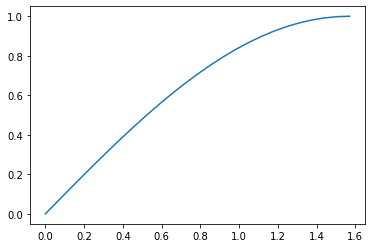

In [7]:
# Practice: Create your tensor, print max and min number, plot the sin result diagram

# Type your code here
x = torch.linspace(0, np.pi/2, steps=25)
print('max x : ', x.max())
print('max x : ', x.min())
y = torch.sin(x)

plt.plot(x.numpy(), y.numpy())

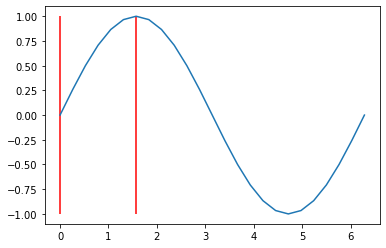

In [8]:
x = torch.linspace(0, 2*np.pi, steps=25)
y = torch.sin(x)
plt.vlines(x=0, ymin=-1, ymax=1, color='red')
plt.vlines(x=np.pi/2, ymin=-1, ymax=1, color='red')
plt.plot(x.numpy(), y.numpy())

### 1-1-4. Tensor Operations

Implement the tensor subtraction with <code>u</code> and <code>v</code> as u-v.


#### Addition and Subtraction

In [9]:
# Try by yourself to get a result of u-v

u = torch.tensor([1, 0])
v = torch.tensor([0, 1])

w = u - v
print(w)

tensor([ 1, -1])


참고로 현재 버전 pytorch에서는 dtype 다른 tensor들끼리도 연산이 가능하다.  
결과값은 `float64` 텐서다.

In [10]:
torch.tensor([1,2,3],dtype=torch.int64)+torch.tensor([1,2,3],dtype=torch.float64)

tensor([2., 4., 6.], dtype=torch.float64)

#### Dot Product

Convert the list <i>[-1, 1]</i> and <i>[1, 1]</i> to tensors <code>u</code> and <code>v</code>. Then, plot the tensor <code>u</code> and <code>v</code> as a vector by using the function <code>plotVec</code> and find the dot product:


In [11]:
# Plot vecotrs, please keep the parameters in the same length
# @param: Vectors = [{"vector": vector variable, "name": name of vector, "color": color of the vector on diagram}]
    
def plotVec(vectors):
    ax = plt.axes()
    
    # For loop to draw the vectors
    for vec in vectors:
        ax.arrow(0, 0, *vec["vector"], head_width = 0.05,color = vec["color"], head_length = 0.1)
        plt.text(*(vec["vector"] + 0.1), vec["name"])
    
    plt.ylim(-2,2)
    plt.xlim(-2,2)

Dot Product of u, v tensor(0)


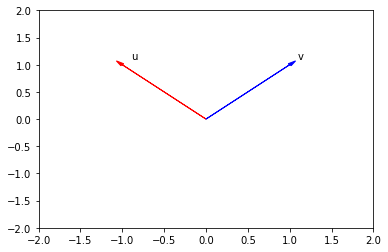

In [12]:
# Practice: calculate the dot product of u and v, and plot out two vectors

# Type your code here
u = torch.tensor([-1,1])
v = torch.tensor([1,1])

print('Dot Product of u, v', torch.dot(u,v)) # -1 * 1 + 1 * 1
plotVec([
    {"vector": u.numpy(), "name": 'u', "color": 'r'},
    {"vector": v.numpy(), "name": 'v', "color": 'b'},
])

### 1-1-5. cf) broadcast

In [13]:
x = np.arange(4)
xx = x.reshape(4,1)
y = np.ones(5)
z = np.ones((3,4))

In [18]:
y

array([1., 1., 1., 1., 1.])

In [14]:
xx + y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [15]:
print(xx)
print(xx.shape)

[[0]
 [1]
 [2]
 [3]]
(4, 1)


In [16]:
print(y)
print(y.shape)

[1. 1. 1. 1. 1.]
(5,)


In [19]:
print(xx + y)
print((xx+y).shape)

[[1. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2.]
 [3. 3. 3. 3. 3.]
 [4. 4. 4. 4. 4.]]
(4, 5)


In [20]:
x1 = np.concatenate([xx, xx, xx, xx, xx], axis=1) # xx를 열 기준으로 5번 concat
x1

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3]])

In [21]:
yy = y.reshape(1,5)
y1 = np.concatenate([yy, yy, yy, yy], axis=0) # y를 행 기준으로 4번 concat
y1

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [22]:
x1 + y1 # = xx + y

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

## 1-2. 2D Tensors

### 1-2-1. Types and Shape

Try to convert the following Pandas Dataframe  to a tensor


In [23]:
# Practice: try to convert Pandas Series to tensor

df = pd.DataFrame({'A':[11, 33, 22],'B':[3, 3, 2]})

In [24]:
answer = torch.from_numpy(df.values)
print('numpy to tensor : ', answer)
print('dtype : ', answer.dtype)

numpy to tensor :  tensor([[11,  3],
        [33,  3],
        [22,  2]])
dtype :  torch.int64


### 1-2-2. Indexing and Slicing

Try to change the values on the second column and the last two rows to 0. Basically, change the values on <code>tensor_ques[1][1]</code> and <code>tensor_ques[2][1]</code> to 0.


In [25]:
# Practice: Use slice and index to change the values on the matrix tensor_ques.

tensor_ques = torch.tensor([[11, 12, 13], [21, 22, 23], [31, 32, 33]])
tensor_ques

tensor([[11, 12, 13],
        [21, 22, 23],
        [31, 32, 33]])

In [26]:
# select the values on the second colum and the last two rows to 0
tensor_ques[1:3,1]

tensor([22, 32])

In [27]:
tensor_ques[1:3,1] = 0
print('Results : ', tensor_ques)

Results :  tensor([[11, 12, 13],
        [21,  0, 23],
        [31,  0, 33]])


### 1-2-3. Tensor Operations

Try to create your own two tensors (<code>X</code> and <code>Y</code>) with different sizes, and multiply them.


In [28]:
# Practice: Calculate the product of two tensors (X and Y) with different sizes 

# Type your code here
X = torch.tensor([[0, 1], [1, 2]])
Y = torch.tensor([[0, 1, 2, 3], [1, 2, 3, 4]])

X_times_Y = torch.mm(X, Y)
print('The Result of A * B : ', X_times_Y)

The Result of A * B :  tensor([[ 1,  2,  3,  4],
        [ 2,  5,  8, 11]])


In [29]:
print('size of X : ', X.size())
print('size of Y : ', Y.size())

if X.shape == Y.shape:
    print('X와 Y의 shape이 동일한가요? : {}'.format('네'))
else:
    print('X와 Y의 shape이 동일한가요? : {}'.format('아니요'))
    print('shape이 다른 tensor는 matrix multiplication으로 계산하세요.')

size of X :  torch.Size([2, 2])
size of Y :  torch.Size([2, 4])
X와 Y의 shape이 동일한가요? : 아니요
shape이 다른 tensor는 matrix multiplication으로 계산하세요.


## 2. Derivatives

### 2-1. Derivatives

Determine the derivative of $ y = 2x^3+x $ at $x=1$


In [30]:
# Practice: Calculate the derivative of y = 2x^3 + x at x = 1

# Type your code here

x = torch.tensor(1., requires_grad=True)
y = 2 * x ** 3 + x

y.backward() # y에 backward  y.backwar(x) 안되낭, 두번 계산할 때는 backward 초기화,,,
print('The derivative at x = 1:', x.grad) # gradient는 x에 저장됨  

The derivative at x = 1: tensor(7.)


$ \frac{dy(x)}{dx} = 6x^{2} + 1$  

$ \frac{dy(x=1)}{dx} = 6*1^{2} + 1$

In [31]:
print('data:',x.data)
print('grad_fn:',x.grad_fn)
print('grad:',x.grad)
print("is_leaf:",x.is_leaf)
print("requires_grad:",x.requires_grad)

data: tensor(1.)
grad_fn: None
grad: tensor(7.)
is_leaf: True
requires_grad: True


In [32]:
print('data:',y.data)
print('grad_fn:',y.grad_fn)
print('grad:',y.grad)
print("is_leaf:",y.is_leaf)
print("requires_grad:",y.requires_grad)

data: tensor(3.)
grad_fn: <AddBackward0 object at 0x7f854d8a5910>
grad: None
is_leaf: False
requires_grad: True


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  This is separate from the ipykernel package so we can avoid doing imports until


### 2-2. cf) is.leaf

[파이토치 공식문서 참조](https://pytorch.org/docs/stable/generated/torch.Tensor.is_leaf.html)

leaf : 제일 처음 생성된 값인지 (최하단 변수인지)

* requires_grad=False 면 무조건 leaf

In [ ]:
a = torch.tensor([3.])
a.is_leaf

True

In [ ]:
a[0] = 1.
a.is_leaf # tensor 값을 변경하는 건 leaf와 관계없음

True

In [ ]:
a1 = torch.tensor(3.).cuda() # 무조건 leaf
a1.is_leaf

True

* requires_grad=True 후 아무 operation도 없을때만 leaf

In [ ]:
b = torch.tensor(3., requires_grad=True)
b.is_leaf

True

In [ ]:
c = torch.tensor(3., requires_grad=True).cuda() # grad 선언 후 cuda로 옮겨갔기 때문에 leaf가 아니다.
c.is_leaf

False

In [ ]:
d = torch.tensor(3., requires_grad=True) + 2. # grad 선언 후 연산이 진행됐기 때문에 leaf가 아니다.
d.is_leaf

False

* 응용

In [ ]:
e = torch.tensor(3.).cuda().requires_grad_() # grad 선언 후 연산이 진행되지 않았기에 leaf
e.is_leaf

True

In [ ]:
f = torch.tensor(3., requires_grad=True, device="cuda") # grad 선언 후 연산이 진행되지 않았기에 leaf
f.is_leaf

True

### 2-3. cf) Custom Autograd Function  
`torch.autograd.Function` 클래스를 상속받음으로써 커스터마이징할 수 있음

In [ ]:
class SQ(torch.autograd.Function):

    def forward(ctx, i):
        """
        In the forward pass we receive a Tensor containing the input and return
        a Tensor containing the output. ctx is a context object that can be used
        to stash information for backward computation. You can cache arbitrary
        objects for use in the backward pass using the ctx.save_for_backward method.
        """
        result=i**3 # output 식 적어줘야함
        ctx.save_for_backward(i) # input 값 저장
        return result

    def backward(ctx, grad_output):
        """
        In the backward pass we receive a Tensor containing the gradient of the loss
        with respect to the output, and we need to compute the gradient of the loss
        with respect to the input.
        """
        i, = ctx.saved_tensors
        grad_output = 3*i**2 # derivates 결과식 적어줘야함
        return grad_output

In [ ]:
x=torch.tensor(2.0,requires_grad=True)
sq=SQ.apply

y=sq(x) # forward = gra
print('y : ', y)
print('y.grad_fn : ', y.grad_fn)
y.backward()
print('x.grad : ', x.grad)

y :  tensor(8., grad_fn=<SQBackward>)
y.grad_fn :  <torch.autograd.function.SQBackward object at 0x7f4dbb9868c0>
x.grad :  tensor(12.)


### 2-4. Partial Derivates

#### 참고  
* `requires_grads=True`인 tensor는 tensor를 바로 .numpy() 로 변환 불가능  
* `.detach().numpy()` 로 변환 가능

Try to determine partial derivative  $u$ of the following function where $u=2$ and $v=1$: $ f=uv+(uv)^2$


In [ ]:
# Practice: Calculate the derivative of f = u * v + (u * v) ** 2 at u = 2, v = 1

# Type the code here
u = torch.tensor(2., requires_grad=True)
v = torch.tensor(1., requires_grad=True)
y = u*v + (u*v)**2

y.backward()
print(u.grad)

tensor(5.)


$\frac{{\partial f(u,v)}}{\partial {u}}=v+2uv^{2}$  
$\frac{{\partial f(u=2,v=1)}}{\partial {u}}=1+2*2*1^{2}$ 

## 3-1. Simple Dataset

In [ ]:
# These are the libraries will be used for this lab.

import torch
from torch.utils.data import Dataset
torch.manual_seed(1)

### 3-1-1. Simple dataset

In [ ]:
# Define class for dataset

class toy_set(Dataset):
    
    # Constructor with defult values 
    def __init__(self, length = 100, transform = None):
        self.len = length
        self.x = 2 * torch.ones(length, 2)
        self.y = torch.ones(length, 1)
        self.transform = transform
     
    # Getter
    def __getitem__(self, index): # indexing 내장함수
        sample = self.x[index], self.y[index]
        if self.transform:
            sample = self.transform(sample)     
        return sample
    
    # Get Length 
    def __len__(self): # 길이 내장함수
        return self.len

In [ ]:
# Create Dataset Object. Find out the value on index 1. Find out the length of Dataset Object.

our_dataset = toy_set()
print("Our toy_set object: ", our_dataset)
print("Value on index 0 of our toy_set object: ", our_dataset[0])
print("Our toy_set length: ", len(our_dataset))

Our toy_set object:  <__main__.toy_set object at 0x7f544f6ed550>
Value on index 0 of our toy_set object:  (tensor([2., 2.]), tensor([1.]))
Our toy_set length:  100


Try to create an <code>toy_set</code> object with length <b>50</b>. Print out the length of your object.


In [ ]:
answer = toy_set(length=50)
print(len(answer))

50


### 3-1-2. Transforms

In [ ]:
# Practice: Construct your own my_add_mult transform. Apply my_add_mult on a new toy_set object. Print out the first three elements from the transformed dataset.

# Type your code here.

In [ ]:
class my_add_mult(object):
    
    # Constructor
    def __init__(self, add = 1, mul = 2):
        self.add = add
        self.mul = mul
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.add
        y = y + self.add
        x = x * self.mul
        y = y * self.mul
        sample = x, y
        return sample

In [ ]:
data = toy_set()
addmul = my_add_mult()
tdata = toy_set(transform=addmul)

for i in range(3):
    x, y = data[i]
    xt, yt = tdata[i]
    print('Result of ',i)
    print('Original data - x : {}, y : {}'.format(x,y))
    print('Transformed data - x : {}, y : {}'.format(xt,yt))

Result of  0
Original data - x : tensor([2., 2.]), y : tensor([1.])
Transformed data - x : tensor([6., 6.]), y : tensor([4.])
Result of  1
Original data - x : tensor([2., 2.]), y : tensor([1.])
Transformed data - x : tensor([6., 6.]), y : tensor([4.])
Result of  2
Original data - x : tensor([2., 2.]), y : tensor([1.])
Transformed data - x : tensor([6., 6.]), y : tensor([4.])


### 3-1-3. Compose

In [ ]:
from torchvision import transforms

Try to combine the <code>mult()</code> and <code>add_mult()</code> as <code>mult()</code> to be executed first. And apply this on a new <code>toy_set</code> dataset. Print out the first 3 elements in the transformed dataset.


In [ ]:
# Create tranform class add_mult

class add_mult(object):
    
    # Constructor
    def __init__(self, addx = 1, muly = 2):
        self.addx = addx
        self.muly = muly
    
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.muly
        sample = x, y
        return sample

In [ ]:
# Create tranform class mult

class mult(object):
    
    # Constructor
    def __init__(self, mult = 100):
        self.mult = mult
        
    # Executor
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x * self.mult
        y = y * self.mult
        sample = x, y
        return sample

In [ ]:
transform_list = transforms.Compose([add_mult(), mult()])
compose_data = toy_set(transform=transform_list)
data = toy_set()
for i in range(3):
    x, y = data[i]
    xt, yt = compose_data[i]
    print('Result of ',i)
    print('Original data - x : {}, y : {}'.format(x,y))
    print('Transformed data - x : {}, y : {}'.format(xt,yt))

Result of  0
Original data - x : tensor([2., 2.]), y : tensor([1.])
Transformed data - x : tensor([300., 300.]), y : tensor([200.])
Result of  1
Original data - x : tensor([2., 2.]), y : tensor([1.])
Transformed data - x : tensor([300., 300.]), y : tensor([200.])
Result of  2
Original data - x : tensor([2., 2.]), y : tensor([1.])
Transformed data - x : tensor([300., 300.]), y : tensor([200.])


## 3-2. Datasets and Transforms

In [ ]:
# These are the libraries will be used for this lab.

import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
torch.manual_seed(0)

In [ ]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os

### 3-2-1. 데이터 로드  
MNIST 데이터셋

In [ ]:
! wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz -P /resources/data

--2021-06-30 07:44:27--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/img.tar.gz
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50460 (49K) [application/x-tar]
Saving to: ‘/resources/data/img.tar.gz’

img.tar.gz          100%[===================>]  49.28K   168KB/s    in 0.3s    

2021-06-30 07:44:29 (168 KB/s) - ‘/resources/data/img.tar.gz’ saved [50460/50460]



In [ ]:
!tar -xf /resources/data/img.tar.gz 

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv 

--2021-06-30 07:44:30--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0110EN-SkillsNetwork/labs/Week1/data/index.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1680905 (1.6M) [text/csv]
Saving to: ‘index.csv’

index.csv           100%[===================>]   1.60M  1.26MB/s    in 1.3s    

2021-06-30 07:44:33 (1.26 MB/s) - ‘index.csv’ saved [1680905/1680905]



In [ ]:
# 텐서를 array로 변환 후 reshape해서 이미지로 보여주는 함수

def show_data(data_sample, shape = (28, 28)): # shape default = (28,28)
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In [ ]:
# Read CSV file from the URL and print out the first five samples
directory=""
csv_file ='index.csv'
csv_path=os.path.join(directory,csv_file) # 문자열 여러개를 path로 연결해주는 함수

In [ ]:
data_name = pd.read_csv(csv_path)
data_name.head() # image category와 image file name으로 구성된 데이터

,category,image
0,Ankle boot,img/fashion0.png
1,T-shirt,img/fashion1.png
2,T-shirt,img/fashion2.png
3,Dress,img/fashion3.png
4,T-shirt,img/fashion4.png


In [ ]:
# Create your own dataset object

class Dataset(Dataset):

    # Constructor (변수 선언)
    def __init__(self, csv_file, data_dir, transform=None):
        
        # Image directory
        self.data_dir=data_dir
        
        # The transform is goint to be used on image
        self.transform = transform
        data_dircsv_file=os.path.join(self.data_dir,csv_file)
        # Load the CSV file contians image info
        self.data_name= pd.read_csv(data_dircsv_file)
        
        # Number of images in dataset
        self.len=self.data_name.shape[0] 
    
    # Get the length (객체의 길이를 반환해주는 내장함수)
    def __len__(self):
        return self.len
    
    # Getter (인덱싱 시 데이터를 반환해주는 내장함수)
    def __getitem__(self, idx): 
        
        # Image file path
        img_name=os.path.join(self.data_dir,self.data_name.iloc[idx, 1])
        # Open image file
        image = Image.open(img_name)
        
        # The class label for the image
        y = self.data_name.iloc[idx, 0]
        
        # If there is any transform method, apply it onto the image
        if self.transform:
            image = self.transform(image)

        return image, y

In [ ]:
dataset = Dataset(csv_file=csv_file, data_dir=directory)

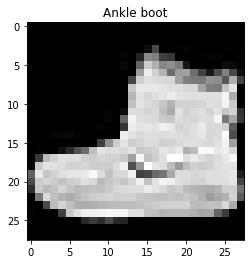

In [ ]:
image=dataset[0][0]
y=dataset[0][1]

plt.imshow(image, cmap='gray')
plt.title(y)
plt.show()

### 3-2-2. Transformation

In [ ]:
import torchvision.transforms as transforms

`transforms.Compose([])` : transformation 연결  
`transforms.CenterCrop(int)`  
`transforms.ToTensor()`  
`transforms.RandomVerticalFlip(p=num)`

Try to use the <code>RandomVerticalFlip</code> (vertically flip the image) with horizontally flip and convert to tensor as a compose. Apply the compose on image. Use <code>show_data()</code> to plot the second image (the image as <b>2</b>).


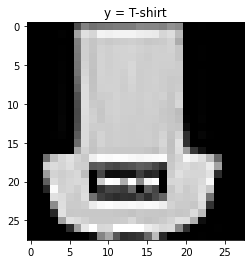

In [ ]:
# Practice: Combine vertical flip, horizontal flip and convert to tensor as a compose. Apply the compose on image. Then plot the image

# Type your code here

transform_list = transforms.Compose([transforms.RandomVerticalFlip(p=1), transforms.RandomHorizontalFlip(p=1), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file, data_dir=directory, transform=transform_list)
show_data(dataset[1])

## 3-3. Prebuilt Datasets and Transforms  
3-2와 다른점 : `dsets` 라이브러리의 prebuilt dataset을 사용


In [ ]:
import torch
import torchvision.datasets as dsets

In [ ]:
# Show data by diagram

def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

Try to use the <code>RandomVerticalFlip</code> (vertically flip the image) with horizontally flip and convert to tensor as a compose. Apply the compose on image. Use <code>show_data()</code> to plot the second image (the image as <b>2</b>).


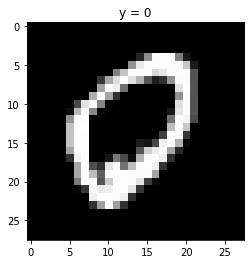

In [ ]:
transform_list = transforms.Compose([transforms.RandomVerticalFlip(p=1), transforms.RandomHorizontalFlip(p = 1), transforms.ToTensor()])
dataset = dsets.MNIST(root = './data', download = True, transform = transform_list)
show_data(dataset[1])